# Milestone 2 - Initial Models
Version: August-2020 Capstone Project
## Author - Priya Asokan

## Instructions

Create a new notebook for this assignment named Milestone02_studentname.ipynb (replacing studentname with your own).

1. Split prepared data from Milestone 1 into training and testing
2. Build a decision tree model that detects faulty products
3. Build an ensemble model that detects faulty products
4. Build an SVM model
5. Evaluate all three models
6. Describe your findings

## Abstract
Dataset used here is SECOM Manufacturing.This contains two different datasets, first set consists of different sensor readings  and the second dataset consists of classification of the data on different timestamps.

I have prepared and cleaned the data and used some plots to analyze the data.This dataset is highly imbalanced.I am building a logistic Regression model to predict fault detection in manufacturing process.To handle imbalanced dataset , I am using SMOTE (Synthetic Minority Oversampling Technique). As this dataset set has large number of features, I am using feature selection techniques like Filter,wrapper & embedded methods to reduce dimensionality of the data and build a robust model. I have also applied hyper parameter tuning from the best feauters selected to make more accurate predictions.

## Problem
This dataset predicts pass/fail tests from SECOM manufacturing process by building classification models and evaluating the models with the best scores.

## Summary

In [98]:
#Import necassary libraries
import pandas as pd
import numpy as np


from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV,StratifiedKFold
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import LinearSVC
from sklearn.svm import SVC

from sklearn.model_selection import GridSearchCV, PredefinedSplit
from sklearn.feature_selection import SelectFromModel

from imblearn.over_sampling import SMOTE

import matplotlib.pyplot as plt
import seaborn as sns

import os
from sklearn.tree import export_graphviz
from IPython.display import Image

from sklearn.tree import plot_tree
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import auc
from sklearn.metrics import classification_report

In [99]:
#Set Random value
SEED = 40

In [100]:
# Read Data
# Load Dataset
df_secom = pd.read_csv('https://raw.githubusercontent.com/PriyaVj-DS/Assignments/master/datasets/secom.csv',sep=" ")
df_secom.shape

(1566, 590)

In [101]:
# Load the first dataset with column names
url = "https://raw.githubusercontent.com/PriyaVj-DS/Assignments/master/datasets/secom.csv"
names = ["feature" + str(x) for x in range(1,591)]
df_secom = pd.read_csv(url, sep=" ", names=names, na_values = "NaN") 

In [102]:
# Load the second dataset with column names
url_l = "https://raw.githubusercontent.com/PriyaVj-DS/Assignments/master/datasets/secom_labels.csv"
secom_labels = pd.read_csv(url_l,sep=" ",names = ["classification","date"],parse_dates = ["date"],na_values = "NaN")
secom_labels.head()

,classification,date
0,-1,2008-07-19 11:55:00
1,-1,2008-07-19 12:32:00
2,1,2008-07-19 13:17:00
3,-1,2008-07-19 14:43:00
4,-1,2008-07-19 15:22:00


In [103]:
# Merge two datasets
secom_df = pd.merge(df_secom,secom_labels,left_index = True,right_index = True)
secom_df.head()

,feature1,feature2,feature3,feature4,feature5,feature6,feature7,feature8,feature9,feature10,...,feature583,feature584,feature585,feature586,feature587,feature588,feature589,feature590,classification,date
0,3030.93,2564.00,2187.7333,1411.1265,1.3602,100.0,97.6133,0.1242,1.5005,0.0162,...,0.5005,0.0118,0.0035,2.3630,NaN,NaN,NaN,NaN,-1,2008-07-19 11:55:00
1,3095.78,2465.14,2230.4222,1463.6606,0.8294,100.0,102.3433,0.1247,1.4966,-0.0005,...,0.5019,0.0223,0.0055,4.4447,0.0096,0.0201,0.0060,208.2045,-1,2008-07-19 12:32:00
2,2932.61,2559.94,2186.4111,1698.0172,1.5102,100.0,95.4878,0.1241,1.4436,0.0041,...,0.4958,0.0157,0.0039,3.1745,0.0584,0.0484,0.0148,82.8602,1,2008-07-19 13:17:00
3,2988.72,2479.90,2199.0333,909.7926,1.3204,100.0,104.2367,0.1217,1.4882,-0.0124,...,0.4990,0.0103,0.0025,2.0544,0.0202,0.0149,0.0044,73.8432,-1,2008-07-19 14:43:00
4,3032.24,2502.87,2233.3667,1326.5200,1.5334,100.0,100.3967,0.1235,1.5031,-0.0031,...,0.4800,0.4766,0.1045,99.3032,0.0202,0.0149,0.0044,73.8432,-1,2008-07-19 15:22:00


In [104]:
secom_df.shape

(1567, 592)

## Data Preparation

In [105]:
# Print the list of columns that have more than 1000 Nan values
featuresNullCount = secom_df.isnull().sum()
colsWithMoreNans = []
for i in featuresNullCount.keys():
    if(featuresNullCount[i] >1000):
        print(i, featuresNullCount[i])
        colsWithMoreNans.append(i)

feature86 1341
feature110 1018
feature111 1018
feature112 1018
feature158 1429
feature159 1429
feature221 1341
feature245 1018
feature246 1018
feature247 1018
feature293 1429
feature294 1429
feature359 1341
feature383 1018
feature384 1018
feature385 1018
feature493 1341
feature517 1018
feature518 1018
feature519 1018


In [106]:
# Drop 20 columns that has a count of more than 1000 Nan values
secom_df.drop(colsWithMoreNans, axis = 1, inplace = True)
secom_df.shape

(1567, 572)

In [107]:
secom_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1567 entries, 0 to 1566
Columns: 572 entries, feature1 to date
dtypes: datetime64[ns](1), float64(570), int64(1)
memory usage: 6.8 MB


In [108]:
#fill NA with mean() of each column in Secom dataset
secom_df = secom_df.apply(lambda x: x.fillna(x.mean()),axis=0)


In [109]:
# Check for any null value

secom_df.isnull().any().any()

False

In [110]:
# Drop the date column
secom_df = secom_df.drop(columns = ['date'], axis = 1)
secom_df.shape

(1567, 571)

In [111]:
secom_df.head()

,feature1,feature2,feature3,feature4,feature5,feature6,feature7,feature8,feature9,feature10,...,feature582,feature583,feature584,feature585,feature586,feature587,feature588,feature589,feature590,classification
0,3030.93,2564.00,2187.7333,1411.1265,1.3602,100.0,97.6133,0.1242,1.5005,0.0162,...,97.934373,0.5005,0.0118,0.0035,2.3630,0.021458,0.016475,0.005283,99.670066,-1
1,3095.78,2465.14,2230.4222,1463.6606,0.8294,100.0,102.3433,0.1247,1.4966,-0.0005,...,208.204500,0.5019,0.0223,0.0055,4.4447,0.009600,0.020100,0.006000,208.204500,-1
2,2932.61,2559.94,2186.4111,1698.0172,1.5102,100.0,95.4878,0.1241,1.4436,0.0041,...,82.860200,0.4958,0.0157,0.0039,3.1745,0.058400,0.048400,0.014800,82.860200,1
3,2988.72,2479.90,2199.0333,909.7926,1.3204,100.0,104.2367,0.1217,1.4882,-0.0124,...,73.843200,0.4990,0.0103,0.0025,2.0544,0.020200,0.014900,0.004400,73.843200,-1
4,3032.24,2502.87,2233.3667,1326.5200,1.5334,100.0,100.3967,0.1235,1.5031,-0.0031,...,97.934373,0.4800,0.4766,0.1045,99.3032,0.020200,0.014900,0.004400,73.843200,-1


## Data Split

In [112]:
# Seperate train test set
secom_df_train, secom_df_tune_test = train_test_split(secom_df,
                                    test_size = 0.3,
                                    random_state = SEED,
                                    shuffle = True,
                                    stratify = secom_df['classification'])

In [113]:
# further evenly split between tune and test
secom_df_tune, secom_df_test = train_test_split(secom_df_tune_test,
                                    test_size=0.5,
                                    random_state=SEED,
                                    shuffle=True,
                                    stratify=None)

In [114]:
# double check data dimensions after the split
print(secom_df.shape)
print(secom_df_train.shape)
print(secom_df_tune.shape)
print(secom_df_test.shape)

(1567, 571)
(1096, 571)
(235, 571)
(236, 571)


## Feature Scaling

In [115]:
# scale numeric features
sc = StandardScaler()
sc.fit(secom_df_train)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [116]:
# Set the target train, tune and test values
y_train = secom_df_train["classification"].to_numpy()
y_tune = secom_df_tune["classification"].to_numpy()
y_test = secom_df_test["classification"].to_numpy()

In [117]:
# drop target to predict
secom_df_train = secom_df_train.drop(["classification"], axis=1)
secom_df_tune = secom_df_tune.drop(["classification"], axis=1)
secom_df_test = secom_df_test.drop(["classification"], axis=1)

In [118]:
# feature matrix
X_train = secom_df_train.to_numpy()
X_tune = secom_df_tune.to_numpy()
X_test = secom_df_test.to_numpy()

In [119]:
# feature names
feature_names = secom_df_train.columns

In [120]:
# double check dimensions in training set
print(secom_df_train.shape)
print(X_train.shape)
print(y_train.shape)

#Double check dimensionality in tune set
print(secom_df_tune.shape)
print(X_tune.shape)
print(y_tune.shape)

# double check dimensions in test set
print(secom_df_test.shape)
print(X_test.shape)
print(y_test.shape)

(1096, 570)
(1096, 570)
(1096,)
(235, 570)
(235, 570)
(235,)
(236, 570)
(236, 570)
(236,)


## Mitigate class imbalance using SMOTE

In [121]:
# instantiate SMOTE object
smt = SMOTE(random_state=SEED)
print(smt)

# fit SMOTE
X_train_res, y_train_res = smt.fit_resample(X_train, y_train)

SMOTE(k_neighbors=5, n_jobs=None, random_state=40, sampling_strategy='auto')


In [122]:
# X data dimensions before and after SMOTE
print(X_train.shape)
print(X_train_res.shape)

# Y data dimensions before and after SMOTE
print(y_train.shape)
print(y_train_res.shape)

(1096, 570)
(2046, 570)
(1096,)
(2046,)


In [123]:
# SMOTE makes training data evenly distributed
print(pd.crosstab(y_train, "count"))
print(pd.crosstab(y_train_res, "count"))

col_0  count
row_0       
-1      1023
 1        73
col_0  count
row_0       
-1      1023
 1      1023


## Decision Tree Model

In [124]:
# fit decision tree classifier
estimator = DecisionTreeClassifier(criterion="entropy", 
                                   max_depth=4,
                                   random_state=SEED)

estimator.fit(X_train_res, y_train_res)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=4, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=40, splitter='best')

In [125]:
#Show Tree method to display the Tree
def show_tree(out_name, model, feature_names):
    dotfile = open(out_name + ".dot", "w")
    export_graphviz(model, out_file=dotfile, filled=True, rounded=True, feature_names=feature_names)
    dotfile.close()

    os.system("dot -Tpng {}.dot -o {}.png".format(out_name, out_name))

    return(Image(filename=out_name + ".png", width=500, height=500))

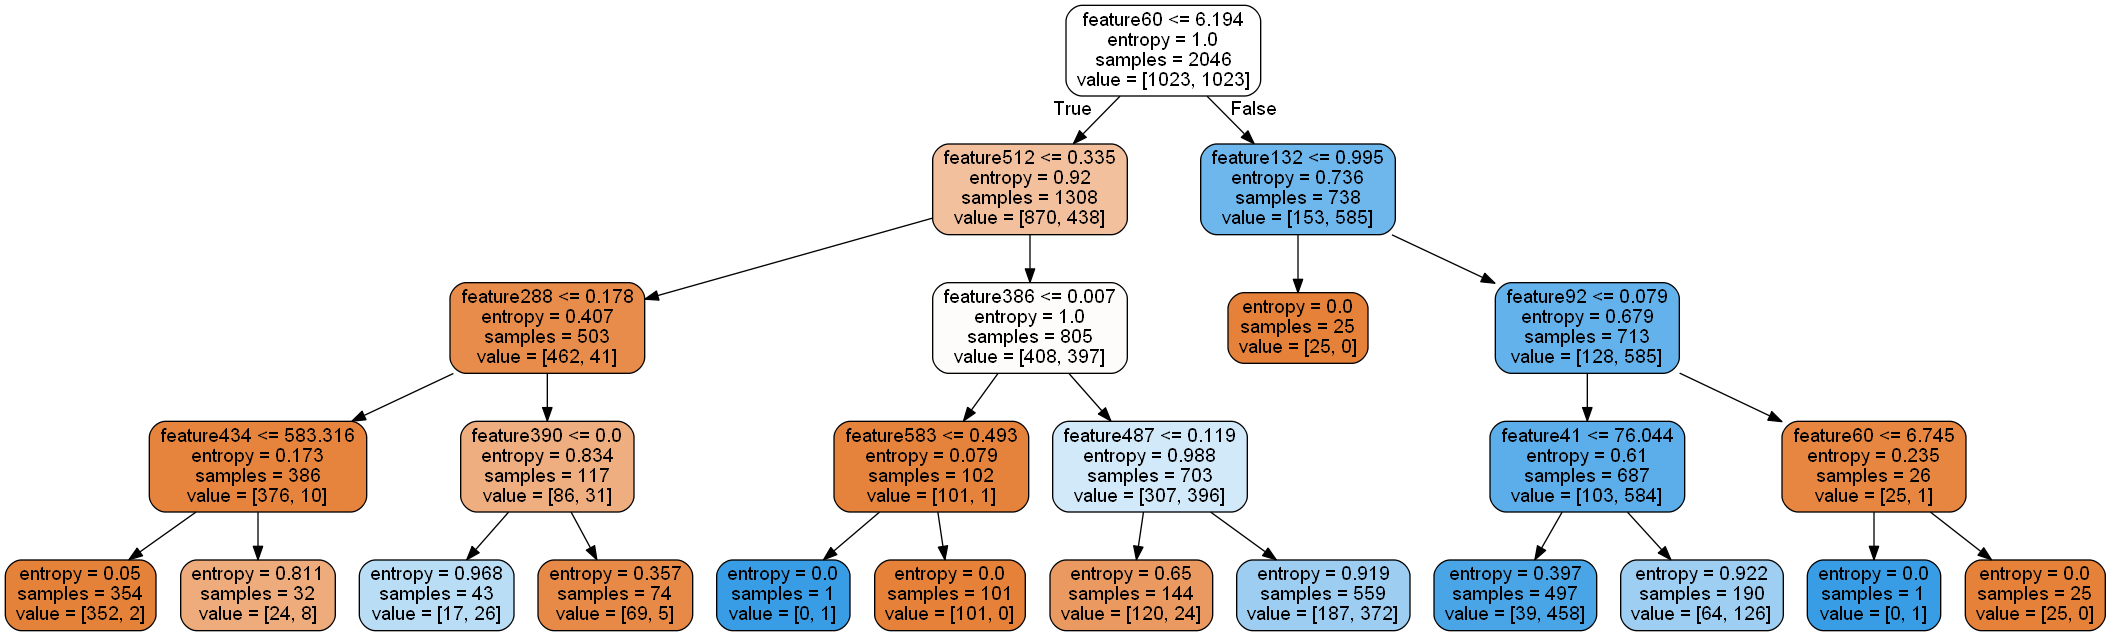

In [126]:
# plot using our own function
show_tree(out_name="secom_tree", model=estimator, feature_names=feature_names)

### Model Performance on Tune Set

In [127]:
# Performance metrics for DT model
def metrics(modelName,X_tune,y_tune): 
    y_tune_pred = modelName.predict(X_tune)
    print('Confusion Matrix')
    # print out confusion matrix
    cm = confusion_matrix(y_true=y_tune, y_pred=y_tune_pred)
    print(cm)
    
    # calculate accuracy on tune set    
    accuracyScoretune = accuracy_score(y_true=y_tune, y_pred=y_tune_pred)
    print('Accuracy of Tune Set : ' + str(accuracyScoretune))  
   
    
    # Draw ROC curve
    y_tune_prob = modelName.predict_proba(X_tune)[:,1]
    fpr, tpr, thresholds = roc_curve(y_true=y_tune, y_score=y_tune_prob)
    roc_auc = roc_auc_score(y_true=y_tune, y_score=y_tune_prob)
    plt.plot(fpr, tpr, color="blue", label="AUC = %0.2f" % roc_auc)
    plt.plot([0, 1], [0, 1], color="red", linestyle="--", lw=1)
    plt.title("Receiver Operating Characteristic")
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.legend(loc="lower right")
    plt.xlim([-0.02, 1.02])
    plt.ylim([-0.02, 1.02])
    plt.show()
    
    # comprehensive classification report
    print(classification_report(y_true=y_tune, y_pred=y_tune_pred)) 

Confusion Matrix
[[136  78]
 [  9  12]]
Accuracy of Tune Set : 0.6297872340425532


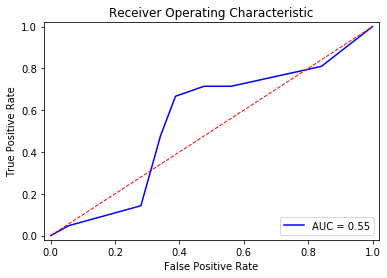

              precision    recall  f1-score   support

          -1       0.94      0.64      0.76       214
           1       0.13      0.57      0.22        21

    accuracy                           0.63       235
   macro avg       0.54      0.60      0.49       235
weighted avg       0.87      0.63      0.71       235



In [128]:
metrics(estimator,X_tune,y_tune)

## Grid Search CV for Hyper-parameter tuning

In [129]:
# grid search
secom_grid = GridSearchCV(
    estimator=DecisionTreeClassifier(random_state=SEED),
    param_grid={
        "criterion": ["entropy", "gini"],
        "max_depth": [3, 4, 5, 6, 7, 8, 9, 10],
        "min_samples_leaf": [10, 20, 30, 40, 50]
    },
    scoring="roc_auc",
    n_jobs=10,
    cv=StratifiedKFold(n_splits=5, random_state=SEED),
    verbose=1,
    refit=True
)

# fit in training data
secom_grid.fit(X_train_res, y_train_res)

Fitting 5 folds for each of 80 candidates, totalling 400 fits


C:\Users\priya\.conda\envs\uwdatasci420\lib\site-packages\sklearn\model_selection\_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning
[Parallel(n_jobs=10)]: Using backend LokyBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done  30 tasks      | elapsed:   12.4s
[Parallel(n_jobs=10)]: Done 180 tasks      | elapsed:   42.2s
[Parallel(n_jobs=10)]: Done 400 out of 400 | elapsed:  1.2min finished


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=40, shuffle=False),
             error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=40,
                                              splitter='best'),
             iid='deprecated', n_jobs=10,
           

In [130]:
# best estimator determined by GridSearchCV
estimator_best = secom_grid.best_estimator_
print(estimator_best)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=10, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=20, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=40, splitter='best')


In [131]:
# best hyper-parameters selected
print(secom_grid.best_params_)

{'criterion': 'entropy', 'max_depth': 10, 'min_samples_leaf': 20}


## Performance Metrics On Tune Set

Confusion Matrix
[[185  29]
 [ 15   6]]
Accuracy of Tune Set : 0.8127659574468085


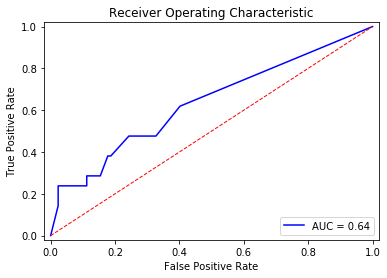

              precision    recall  f1-score   support

          -1       0.93      0.86      0.89       214
           1       0.17      0.29      0.21        21

    accuracy                           0.81       235
   macro avg       0.55      0.58      0.55       235
weighted avg       0.86      0.81      0.83       235



In [132]:
# Get Metrics for Decision Tree with Gini criterion
metrics(secom_grid,X_tune,y_tune)

## Model Performance in Test Set from best model selected

In [133]:
# predict probability on test set
y_test_prob = estimator_best.predict_proba(X_test)[:,1]

# predict class label on test set
y_test_pred = estimator_best.predict(X_test)

In [134]:
# print out confusion matrix
cm = confusion_matrix(y_true=y_test, y_pred=y_test_pred)
print(cm)

[[190  36]
 [  8   2]]


In [135]:
# calculate accuracy 
accuracy_score(y_true=y_test, y_pred=y_test_pred)

0.8135593220338984

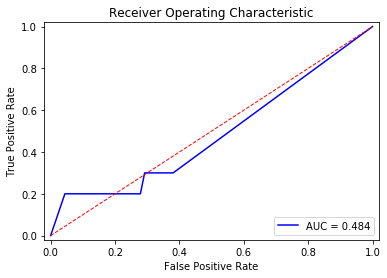

In [136]:
# ROC curve
fpr, tpr, thresholds = roc_curve(y_true=y_test, y_score=y_test_prob)
roc_auc = roc_auc_score(y_true=y_test, y_score=y_test_prob)

plt.plot(fpr, tpr, color="blue", label="AUC = %0.3f" % roc_auc)
plt.plot([0, 1], [0, 1], color="red", linestyle="--", lw=1)
plt.title("Receiver Operating Characteristic")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc="lower right")
plt.xlim([-0.02, 1.02])
plt.ylim([-0.02, 1.02])
plt.show()

In [137]:
# comprehensive classification report
print(classification_report(y_true=y_test, y_pred=y_test_pred)) 

              precision    recall  f1-score   support

          -1       0.96      0.84      0.90       226
           1       0.05      0.20      0.08        10

    accuracy                           0.81       236
   macro avg       0.51      0.52      0.49       236
weighted avg       0.92      0.81      0.86       236



## Results of Decision Tree Model on Test Set
1. Accuracy - 0.62
2. Accuracy scores after hyper parameter tuning -0.81
3. Accuracy scores on Test set- 0.81

## Ensemble Models

### Decision Tree Using Bagging ensemble Technique

In [138]:
# fit bagging with base estimator with the same hyper-parameters as in Random forest
estimator_bagging = BaggingClassifier(base_estimator=estimator_best,
                              n_estimators=50,
                              n_jobs=10,
                              oob_score=True,
                              random_state=SEED,
                              verbose=1)

estimator_bagging.fit(X_train_res, y_train_res)

[Parallel(n_jobs=10)]: Using backend LokyBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done   2 out of  10 | elapsed:    6.6s remaining:   26.7s
[Parallel(n_jobs=10)]: Done  10 out of  10 | elapsed:    8.7s finished


BaggingClassifier(base_estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                        class_weight=None,
                                                        criterion='entropy',
                                                        max_depth=10,
                                                        max_features=None,
                                                        max_leaf_nodes=None,
                                                        min_impurity_decrease=0.0,
                                                        min_impurity_split=None,
                                                        min_samples_leaf=20,
                                                        min_samples_split=2,
                                                        min_weight_fraction_leaf=0.0,
                                                        presort='deprecated',
                                                        random_state=40,


[Parallel(n_jobs=10)]: Using backend LokyBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done   2 out of  10 | elapsed:    0.3s remaining:    1.6s
[Parallel(n_jobs=10)]: Done  10 out of  10 | elapsed:    0.4s finished
[Parallel(n_jobs=10)]: Using backend LokyBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done   2 out of  10 | elapsed:    0.0s remaining:    0.1s


Confusion Matrix
[[198  16]
 [ 14   7]]
Accuracy of Tune Set : 0.8723404255319149


[Parallel(n_jobs=10)]: Done  10 out of  10 | elapsed:    0.0s finished


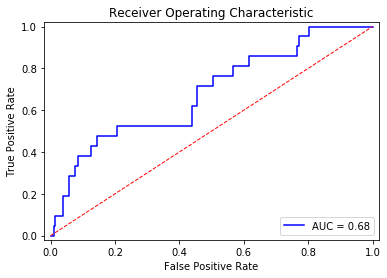

              precision    recall  f1-score   support

          -1       0.93      0.93      0.93       214
           1       0.30      0.33      0.32        21

    accuracy                           0.87       235
   macro avg       0.62      0.63      0.62       235
weighted avg       0.88      0.87      0.87       235



In [139]:
metrics(estimator_bagging,X_tune,y_tune)

In [140]:
# out-of-bag performance estimate
estimator_bagging.oob_score_

0.9208211143695014

## Decision Tree Using Boosting Ensemble Technique

In [141]:
# AdaBoost
estimator_adaboost = AdaBoostClassifier(base_estimator=estimator_best, 
                               n_estimators=50, 
                               learning_rate=1.0, 
                               algorithm="SAMME.R", 
                               random_state=SEED)

estimator_adaboost.fit(X_train_res, y_train_res)

AdaBoostClassifier(algorithm='SAMME.R',
                   base_estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                         class_weight=None,
                                                         criterion='entropy',
                                                         max_depth=10,
                                                         max_features=None,
                                                         max_leaf_nodes=None,
                                                         min_impurity_decrease=0.0,
                                                         min_impurity_split=None,
                                                         min_samples_leaf=20,
                                                         min_samples_split=2,
                                                         min_weight_fraction_leaf=0.0,
                                                         presort='deprecated',
                     

Confusion Matrix
[[212   2]
 [ 21   0]]
Accuracy of Tune Set : 0.902127659574468


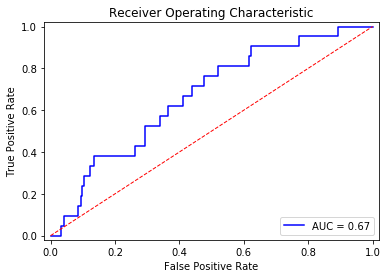

              precision    recall  f1-score   support

          -1       0.91      0.99      0.95       214
           1       0.00      0.00      0.00        21

    accuracy                           0.90       235
   macro avg       0.45      0.50      0.47       235
weighted avg       0.83      0.90      0.86       235



In [142]:
metrics(estimator_adaboost,X_tune,y_tune)

## Gradient Boosting

In [143]:
estimator_GB = GradientBoostingClassifier(learning_rate=0.01,
                                       n_estimators=50,
                                       max_depth=7,
                                       min_samples_leaf=10,
                                       max_features=0.5,
                                       random_state=SEED,
                                       verbose=1,
                                       validation_fraction=0.1,
                                       n_iter_no_change=5, 
                                       tol=1e-3)

estimator_GB.fit(X_train_res, y_train_res)

      Iter       Train Loss   Remaining Time 
         1           1.3708            9.53s
         2           1.3557            9.28s
         3           1.3401            9.52s
         4           1.3253            9.39s
         5           1.3108            9.04s
         6           1.2974            8.89s
         7           1.2837            8.64s
         8           1.2706            8.45s
         9           1.2569            8.26s
        10           1.2434            8.01s
        20           1.1215            5.92s
        30           1.0161            3.87s
        40           0.9237            1.94s
        50           0.8416            0.00s


GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.01, loss='deviance', max_depth=7,
                           max_features=0.5, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=10, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=50,
                           n_iter_no_change=5, presort='deprecated',
                           random_state=40, subsample=1.0, tol=0.001,
                           validation_fraction=0.1, verbose=1,
                           warm_start=False)

In [144]:
print(estimator_GB.n_estimators_)

50


Confusion Matrix
[[194  20]
 [ 15   6]]
Accuracy of Tune Set : 0.851063829787234


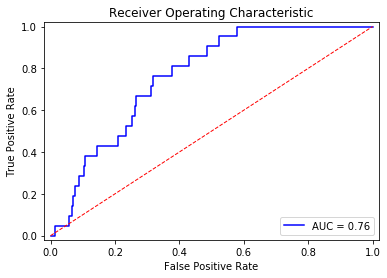

              precision    recall  f1-score   support

          -1       0.93      0.91      0.92       214
           1       0.23      0.29      0.26        21

    accuracy                           0.85       235
   macro avg       0.58      0.60      0.59       235
weighted avg       0.87      0.85      0.86       235



In [145]:
metrics(estimator_GB,X_tune,y_tune)

In [146]:
len(estimator_GB.feature_importances_)

570

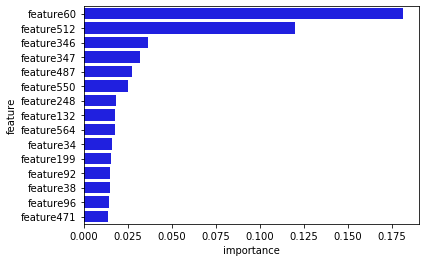

In [147]:
# plot feature importance
df_var_imp = pd.DataFrame({"feature": feature_names, 
                           "importance": estimator_GB.feature_importances_})
df_var_imp.sort_values(by="importance", ascending=False, inplace=True)

sns.barplot(x="importance", y="feature", data=df_var_imp.head(15), color="blue")

## Results of Ensemble Techniques
1. Accuracy scores using Bagging-0.87
2. Accuracy scores using ada boosting- 0.90
3. Accuracy scores using gradient boosting-0.85

## SVM Model

In [148]:
# Using LinearSVC to fit lasso model
lsvc_lasso = LinearSVC(C=0.01, penalty="l1", dual=False)
lsvc_lasso.fit(X_train_res,y_train_res)


C:\Users\priya\.conda\envs\uwdatasci420\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


LinearSVC(C=0.01, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l1', random_state=None, tol=0.0001,
          verbose=0)

In [150]:
#print out confusion matrix
cm = confusion_matrix(y_true=y_tune, y_pred=y_tune_pred)
print(cm)

# calculate accuracy 
accuracyScore = accuracy_score(y_true=y_tune, y_pred=y_tune_pred)
print('Accuracy of Tune Set : ' + str(accuracyScore))

# comprehensive classification report
print(classification_report(y_true=y_tune, y_pred=y_tune_pred))

[[180  34]
 [ 11  10]]
Accuracy of Tune Set : 0.8085106382978723
              precision    recall  f1-score   support

          -1       0.94      0.84      0.89       214
           1       0.23      0.48      0.31        21

    accuracy                           0.81       235
   macro avg       0.58      0.66      0.60       235
weighted avg       0.88      0.81      0.84       235



In [151]:
# double check
print(X_train_res.shape)
print(sum(lsvc_lasso.coef_[0]>0))


(2046, 570)
79


In [152]:
# Sort the coeffecient values
coef = pd.Series(lsvc_lasso.coef_[0]>0,feature_names).sort_values()
print(coef)

feature1      False
feature352    False
feature351    False
feature350    False
feature349    False
              ...  
feature424     True
feature426     True
feature431     True
feature389     True
feature590     True
Length: 570, dtype: bool


In [97]:
print(coef[])

False


In [90]:
# Display Ranks and the columns selected to all features
selected_columns = lsvc_lasso.coef_[0]>0
print(selected_columns)

[False False False False False False False False False False False False
 False False False  True False False False False False  True  True  True
 False False False False False False False False  True  True False False
 False False False False False False False False False  True  True False
 False False  True  True False False False  True False False False  True
  True False  True  True  True False  True False False False  True False
  True  True False False False False False False False False False False
 False False False  True False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False  True False False False  True False  True
 False  True  True False False False False False False False False False
 False False False False False False False False False False  True False
  True False False False False False False False Fa

In [ ]:
features_selected = pd.DataFrame('columns':secom_df['selected_columns'])
feature_rank

feature_names = secom_df.loc[secom_df['selected_columns'] == True]
recursive_feature_names

### Grid Search for Hyper Parameter Tuning SVM

In [55]:
X_train_tune = np.concatenate([X_train_res, X_tune])
y_train_tune = np.concatenate([y_train_res, y_tune])
split_index = np.concatenate([np.repeat(-1, X_train_res.shape[0]), np.repeat(0, X_tune.shape[0])])

In [57]:
# double check dimensions
print(X_train_res.shape)
print(X_tune.shape)
print(X_train_tune.shape)

(2046, 570)
(235, 570)
(2281, 570)


In [ ]:
# defining parameter range 
param_grid = {'C': [0.1, 1, 10],  
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 
              'kernel': ['linear','poly','rbf']}  
  
grid_svm = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3) 
  
# fitting the model for grid search 
grid_svm.fit(X_train_tune, y_train_tune)

Fitting 5 folds for each of 45 candidates, totalling 225 fits
[CV] C=0.1, gamma=1, kernel=linear ...................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


In [ ]:
# grid search
grid_svm = GridSearchCV(
    estimator=SVC(probability=True, random_state=SEED, verbose=0),
    param_grid={
        "C": [0.1, 0.25, 0.5, 0.75, 1, 2, 3, 4, 5],
        "kernel": ["linear", "poly", "rbf"],        
    },
    scoring="roc_auc",
    n_jobs=10,
    cv=PredefinedSplit(split_index), # this uses tune set for hyper-parameter tuning
    verbose=1,
    refit=True
)

# fit in training data, and select hyper-parameters in tune data
grid_svm.fit(X_train_tune, y_train_tune)

Fitting 1 folds for each of 27 candidates, totalling 27 fits


[Parallel(n_jobs=10)]: Using backend LokyBackend with 10 concurrent workers.


In [ ]:
# output detailed validation results
print(grid.cv_results_)

In [ ]:
# put validation results in a better format
pd.DataFrame(grid.cv_results_).head(5)

In [ ]:
# best estimator determined by GridSearchCV
estimator_best = grid.best_estimator_
print(estimator_best)

In [ ]:
# best validation score
print(grid.best_score_)

In [ ]:
# best hyper-parameters selected
print(grid.best_params_)

In [ ]:
# print out confusion matrix
cm = confusion_matrix(y_true=y_tune1, y_pred=y_tune_pred)
print(cm)

# calculate accuracy 
accuracyScore = accuracy_score(y_true=y_tune1, y_pred=y_tune_pred)
print('Accuracy of Tune Set : ' + str(accuracyScore))

# comprehensive classification report
print(classification_report(y_true=y_tune1, y_pred=y_tune_pred))

In [ ]:
# predict probability on tune set
y_tune_prob = estimator_best.predict_proba(X_tune1)[:,1]

# ROC curve
fpr, tpr, thresholds = roc_curve(y_true=y_tune1, y_score=y_tune_prob)
roc_auc = roc_auc_score(y_true=y_tune1, y_score=y_tune_prob)

plt.plot(fpr, tpr, color="blue", label="AUC = %0.3f" % roc_auc)
plt.plot([0, 1], [0, 1], color="red", linestyle="--", lw=1)
plt.title("Receiver Operating Characteristic")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc="lower right")
plt.xlim([-0.02, 1.02])
plt.ylim([-0.02, 1.02])
plt.show()

## Model Performance in Test set from the best model selected

In [98]:
# predict probability on test set
y_test_prob = estimator_GB.predict_proba(X_test)[:,1]

# predict class label on test set
y_test_pred = estimator_GB.predict(X_test)

In [99]:
# print out confusion matrix
cm = confusion_matrix(y_true=y_test, y_pred=y_test_pred)
print(cm)


[[205  21]
 [  8   2]]


In [100]:
# calculate accuracy 
accuracy_score(y_true=y_test, y_pred=y_test_pred)

0.8771186440677966

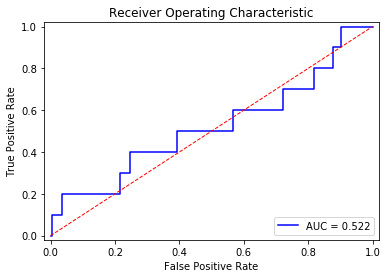

In [101]:
# ROC curve
fpr, tpr, thresholds = roc_curve(y_true=y_test, y_score=y_test_prob)
roc_auc = roc_auc_score(y_true=y_test, y_score=y_test_prob)

plt.plot(fpr, tpr, color="blue", label="AUC = %0.3f" % roc_auc)
plt.plot([0, 1], [0, 1], color="red", linestyle="--", lw=1)
plt.title("Receiver Operating Characteristic")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc="lower right")
plt.xlim([-0.02, 1.02])
plt.ylim([-0.02, 1.02])
plt.show()

In [104]:
# comprehensive classification report
print(classification_report(y_true=y_test, y_pred=y_test_pred))

              precision    recall  f1-score   support

          -1       0.96      0.91      0.93       226
           1       0.09      0.20      0.12        10

    accuracy                           0.88       236
   macro avg       0.52      0.55      0.53       236
weighted avg       0.93      0.88      0.90       236



Model built from ensemble gives better results in test 

## SVM Model